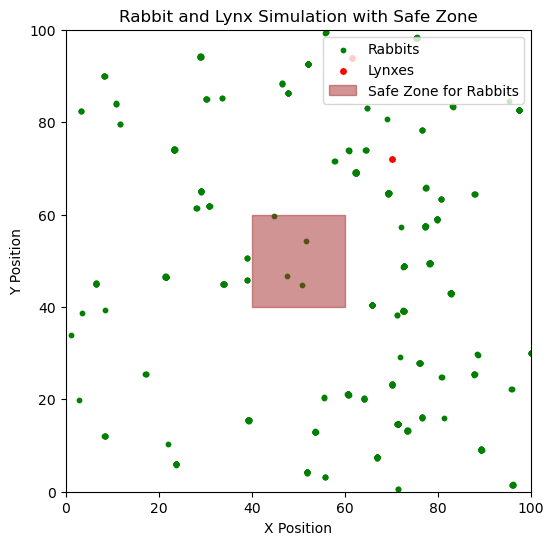

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import random, uniform, choice
import copy as cp

#  Parameters
k = 500  # Carrying capacity of rabbits

x = 80  # Initial rabbit population
mr = 0.02  # Movement magnitude of rabbits
b = .04  # Death rate of rabbits or predation rates
a = 0.6  # Reproduction rate of rabbits

y = 30  # Initial lynx population
ml = 0.05  # Movement magnitude of lynxes
c = 0.2  # Death rate of lynxes when there is no food
h = 0.5  # Reproduction rate of lynxes

cd = 2.0  # Radius for collision detection
cdsq = cd ** 2  # Precompute squared collision radius

# Define agent class
class Agent:
    pass

# Initialize simulation
def initialize():
    global agents
    agents = []
    
    for i in range(x + y):  
        ag = Agent()
        ag.type = 'r' if i < x else 'l'
        ag.x = random() * 100  # Random x-coordinate 
        ag.y = random() * 100  # Random y-coordinate 
        agents.append(ag)

# Update one agent's behavior
def update_one_agent():
    global agents
    if not agents:
        return

    ag = choice(agents)  # Select a random agent either rabbit or lynx

    # Simulating random movement
    m = mr if ag.type == 'r' else ml
    ag.x += uniform(-m, m)
    ag.y += uniform(-m, m)

    # Keep within bounds
    ag.x = max(0, min(100, ag.x))
    ag.y = max(0, min(100, ag.y))

    # Detecting collision and simulating death or birth
    neighbors = [nb for nb in agents if nb.type != ag.type
                 and (ag.x - nb.x) ** 2 + (ag.y - nb.y) ** 2 < cdsq]

    # Define the creek area for non-hunting zone
    creek_x_min = 40  # Left boundary 
    creek_x_max = 60  # Right boundary of the creek
    creek_y_min = 40  # Bottom boundary 
    creek_y_max = 60  # Top boundary of the creek

    # If the agent is a rabbit and it is inside the creek, it cannot be attacked
    if ag.type == 'r' and creek_x_min < ag.x < creek_x_max and creek_y_min < ag.y < creek_y_max:
        return  # Rabbit is safe in the creek

    if ag.type == 'r':
        if neighbors and random() < b:  # If there are lynxes nearby
            agents.remove(ag)  # Rabbit dies
            return
        if random() < a * (1 - sum(1 for x in agents if x.type == 'r') / k):
            agents.append(cp.copy(ag))  # New rabbit is born
    else:
        if not neighbors:  # If there are no rabbits nearby
            if random() < c:
                agents.remove(ag)  # lynx dies
                return
        elif random() < h:  # If there are rabbits nearby
            agents.append(cp.copy(ag))  # New lynx is born

# Initialize the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Update function for animation
def update(frame):
    global agents

    # Perform multiple small updates
    t = 0.
    while t < 1. and agents:
        t += 1. / len(agents)
        update_one_agent()

    ax.clear()  # Clear previous frame

    rabbits = [ag for ag in agents if ag.type == 'r']
    lynxes = [ag for ag in agents if ag.type == 'l']

    # Plot rabbits and lynxes
    if rabbits:
        x_r = [ag.x for ag in rabbits]
        y_r = [ag.y for ag in rabbits]
        ax.scatter(x_r, y_r, color='green', label="Rabbits", s=10)

    if lynxes:
        x_f = [ag.x for ag in lynxes]
        y_f = [ag.y for ag in lynxes]
        ax.scatter(x_f, y_f, color='red', label="Lynxes", s=15, marker="o")

    # Safe zone for rabbits
    ax.fill_between([40, 60], 40, 60, color="brown", alpha=0.5, label="Safe Zone for Rabbits")

    ax.legend(loc='upper right')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_title("Rabbit and Lynx Simulation with Safe Zone")
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")

# Run the animation
def run_simulation(time_steps=20, save_video=False):
    initialize()  # Initialize agents

    ani = animation.FuncAnimation(fig, update, frames=time_steps, interval=20)  # 20ms per frame

    if save_video:
        ani.save('rabbit_lynx_simulation.gif', writer='pillow', fps=10)  # to save as GIF

    plt.show()  # Display the animation

# Start simulation with animation and save as video
run_simulation(time_steps=20, save_video=True)
